In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('Data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       497 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        504 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

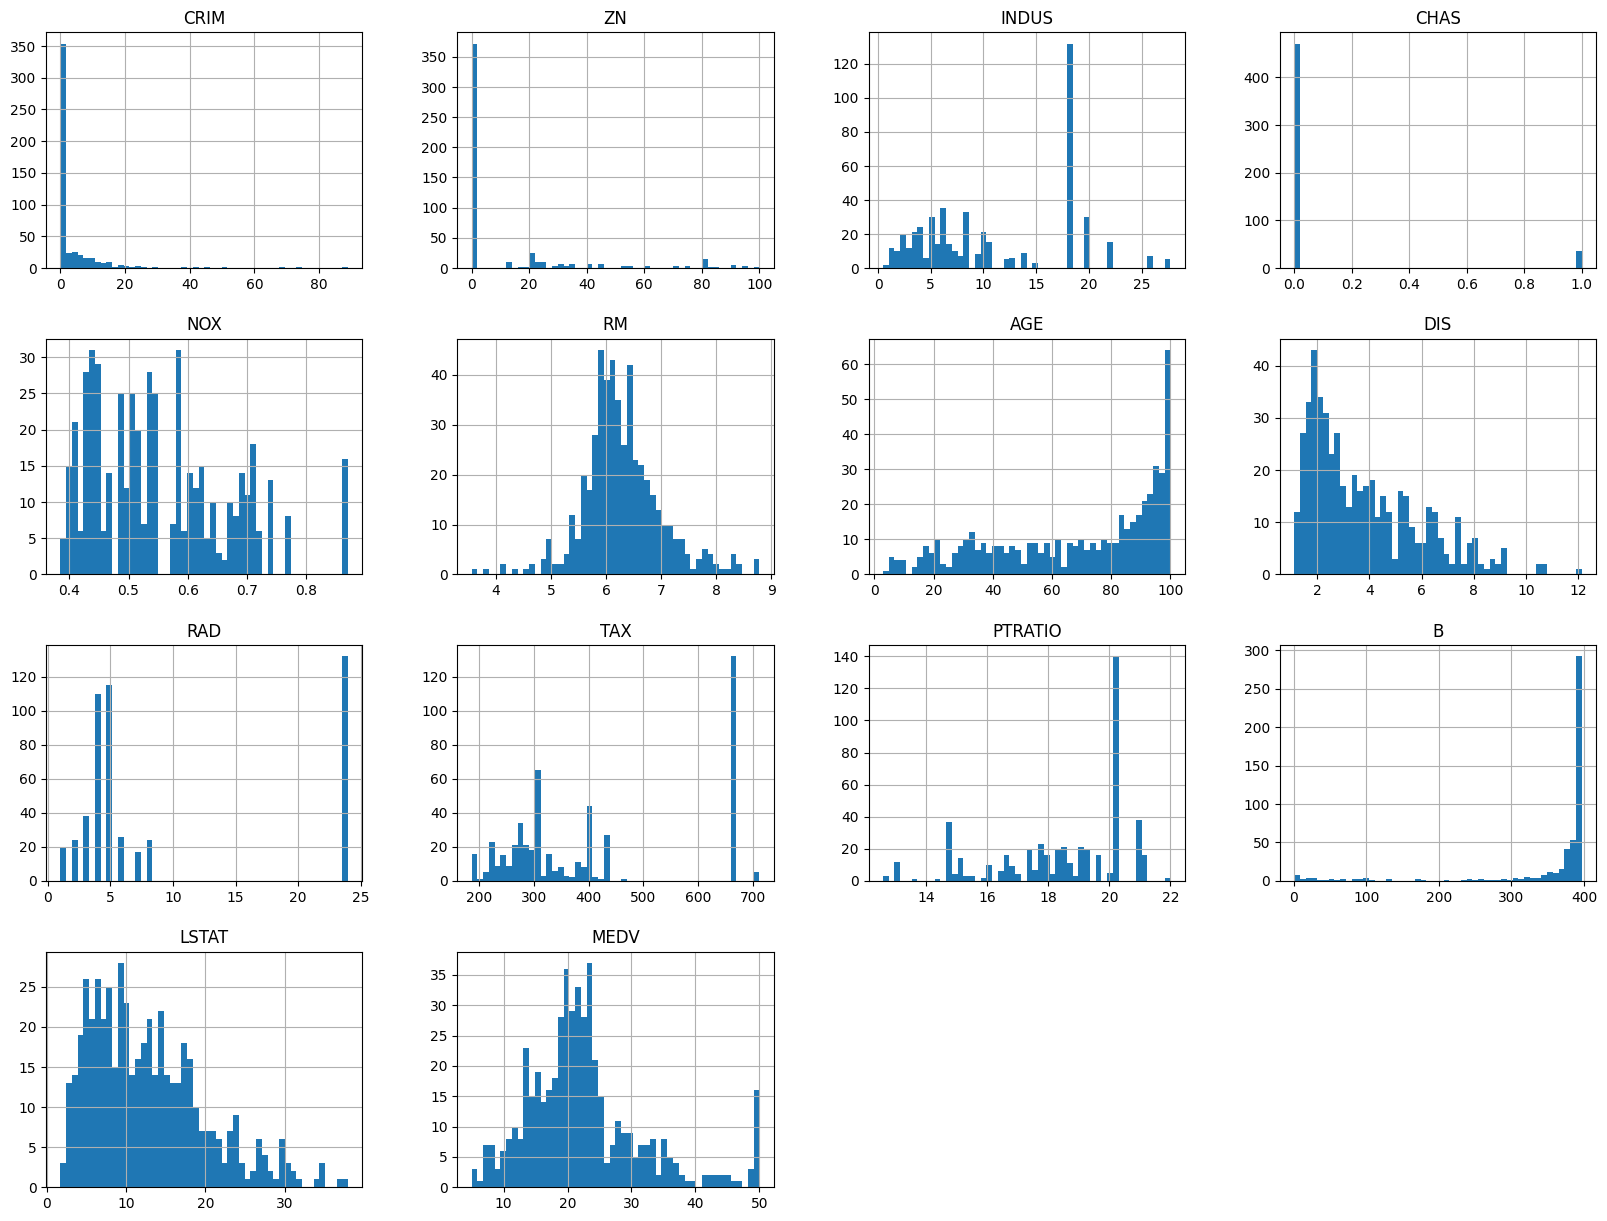

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [8]:
len(train_set), len(test_set)

(404, 102)

In [9]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, random_state = 42, test_size = 0.2)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [12]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [13]:
housing = strat_train_set.copy()

## Looking for correlations

In [14]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680870
B          0.361912
ZN         0.339741
DIS        0.249228
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='RM', ylabel='MEDV'>

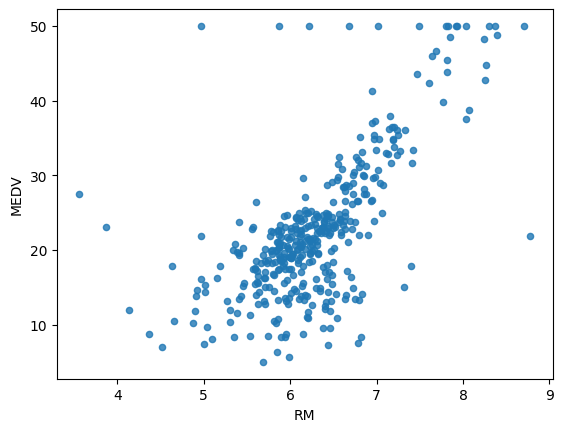

In [15]:
# we have a strong possitive correltaion of 'MEDV' with 'RM'
housing.plot(kind="scatter", x = 'RM', y = 'MEDV', alpha=0.8)

In [16]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set['MEDV'].copy()

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [18]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.13230e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90950e+02, 1.15700e+01])

In [19]:
X = imputer.transform(housing)

In [20]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [21]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281151,69.039851,3.748899,9.735149,412.341584,18.473267,353.379802,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711466,28.258248,2.097569,8.731259,168.672623,2.129243,96.063774,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.132300,5.000000,337.000000,19.000000,390.950000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.622500,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating a pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [23]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [24]:
housing_num_tr.shape

(404, 13)

# Selecting a desired model 

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [26]:
some_data = housing.iloc[:5]

In [27]:
some_labels = housing_labels.iloc[:5]

In [28]:
prepared_data = my_pipeline.transform(some_data)

In [29]:
model.predict(prepared_data)

array([22.269, 25.56 , 16.701, 23.325, 23.664])

In [30]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [31]:
import numpy  as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [32]:
rmse

np.float64(1.2118324680800836)

## Using better evaluation technique - Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [34]:
rmse_scores

array([2.90866447, 2.65609012, 4.41329845, 2.64512702, 3.62050968,
       2.61556929, 4.83521216, 3.38969116, 3.42719005, 3.36295668])

In [35]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ", scores.std())

In [36]:
print_scores(rmse_scores)

Scores:  [2.90866447 2.65609012 4.41329845 2.64512702 3.62050968 2.61556929
 4.83521216 3.38969116 3.42719005 3.36295668]
Mean:  3.387430907085335
Standard deviation:  0.71525152575082


## Saving the model

In [37]:
from joblib import dump, load
dump(model, 'RealEstate.joblib')

['RealEstate.joblib']

## Testing of the model on test data

In [38]:
X_test = strat_test_set.drop('MEDV', axis =1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)

In [39]:
print(final_predictions,list(Y_test))

[24.4   11.186 25.326 22.074 18.475 15.089 19.904 14.151 31.732 41.292
 20.151 11.892 23.821 29.185 19.759 11.208 31.265 14.245 23.76  18.541
 19.894 17.87  18.85  21.665 18.347 31.508 15.962 32.983  8.749 33.902
 24.177 21.472 23.196 10.854 21.441 10.898 43.169 24.65  23.528 41.615
 24.206 30.875 20.224 20.605 18.979 33.196 44.216 20.165 20.383 21.876
 21.366 14.307 21.377 14.541 25.252 34.108 41.213 29.039 19.3   20.676
 46.51   9.359 19.058 25.123 14.415 33.152 21.177 17.985 18.859 34.318
 26.773 23.    21.434 22.09  35.125 12.723 15.546 19.718 20.721 21.587
 22.483 21.143 13.739 22.898 20.668 21.369 13.852 21.317 21.755 23.377
 18.775 27.394  7.163 26.438 19.31  29.873 19.582 31.423 14.484 26.604
 21.864 20.09 ] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [40]:
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [41]:
final_rmse

np.float64(2.987195159605181)